<a href="https://colab.research.google.com/github/Anuskadas564/OIBSIP/blob/main/Iris_flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Iris.csv')


In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df = df.drop(columns=["Id"])


In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['Species'].value_counts()


,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [ ]:
df['Species']

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop(columns=['Species'])
y=df['Species']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40)

In [ ]:
x_train.shape

(90, 4)

In [ ]:
x_test.shape

(60, 4)

In [ ]:
y_train.shape

(90,)

In [ ]:
y_test.shape

(60,)

<Axes: >

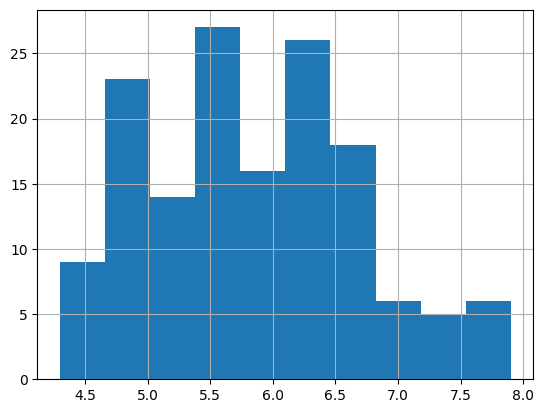

In [ ]:
df['SepalLengthCm'].hist()

<Axes: >

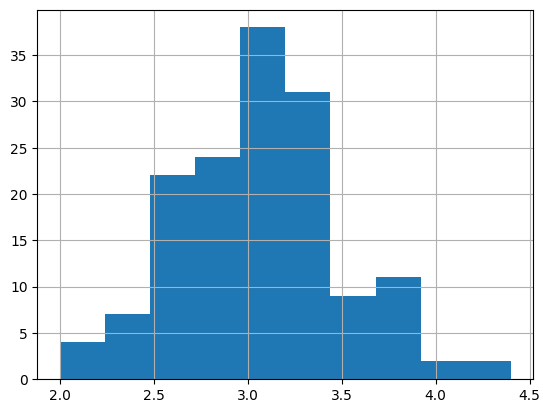

In [ ]:
df['SepalWidthCm'].hist()

<Axes: >

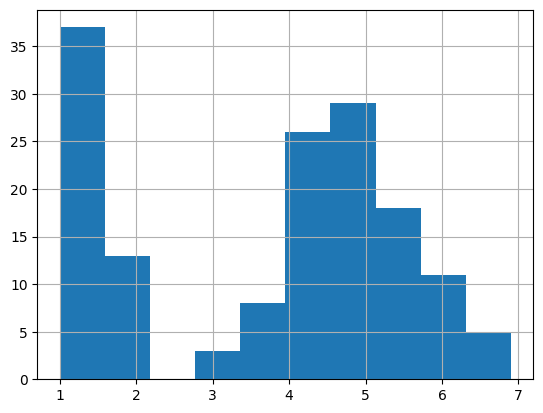

In [ ]:
df['PetalLengthCm'].hist()

<Axes: >

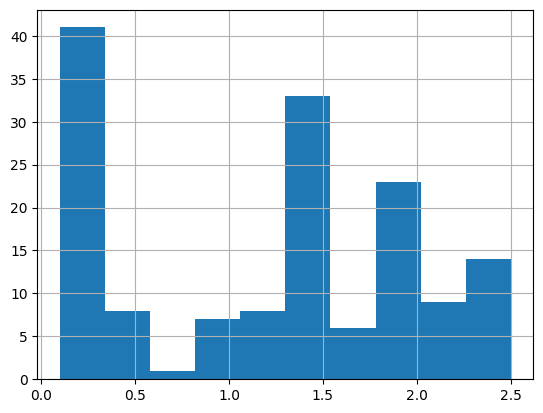

In [ ]:
df['PetalWidthCm'].hist()

<Axes: >

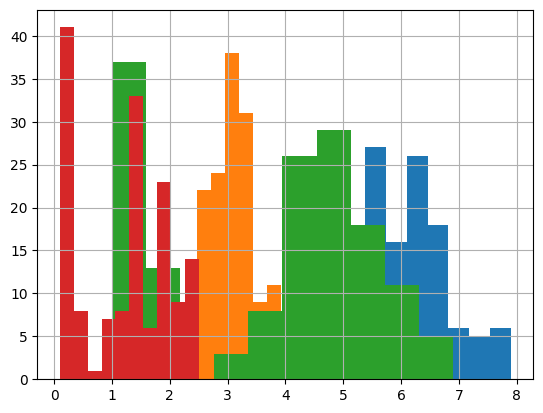

In [ ]:
df['SepalLengthCm'].hist()
df['SepalWidthCm'].hist()
df['PetalLengthCm'].hist()
df['PetalWidthCm'].hist()

In [ ]:
colors = ['red', 'orange', 'blue']
species = [0, 1, 2]



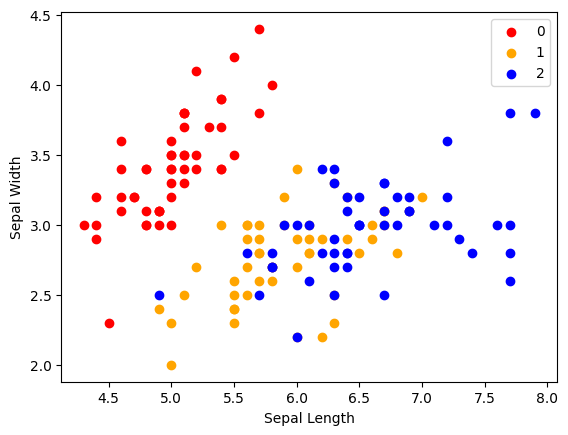

In [ ]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

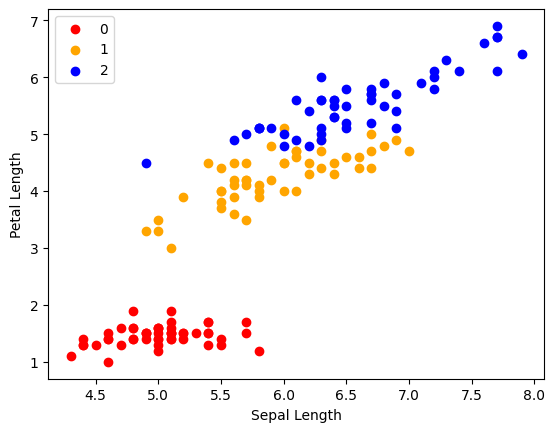

In [ ]:

for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

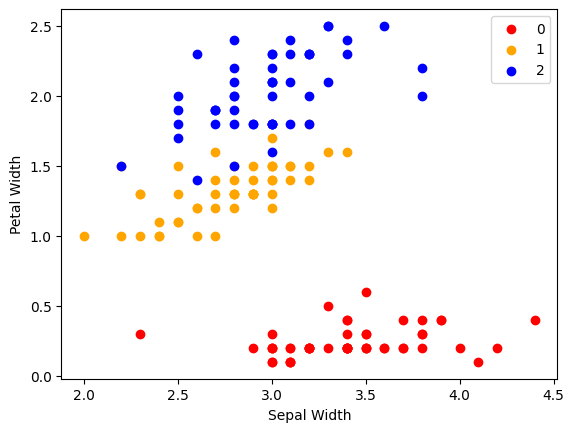

In [ ]:
# Scatter plot for Sepal Width vs Petal Width
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [ ]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

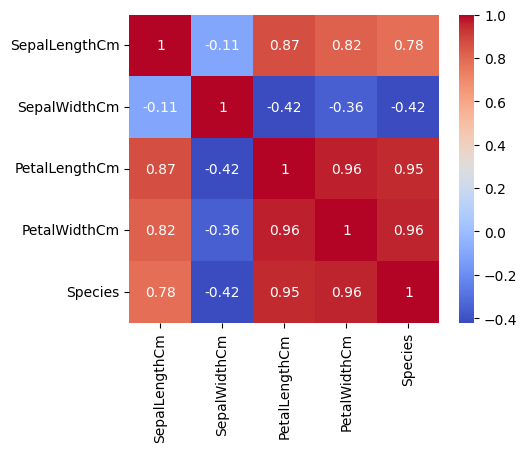

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train, y_train)
print("Accuracy (Logistic Regression): ", model1.score(x_test, y_test) * 100)



Accuracy (Logistic Regression):  98.33333333333333


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(x_train, y_train)
print("Accuracy (KNN): ", model2.score(x_test,y_test)*100)

Accuracy (KNN):  98.33333333333333


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)
print("Accuracy (Decision Tree): ", model3.score(x_test, y_test) * 100)

# Confusion Matrix
from sklearn.metrics import confusion_matrix

y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)

Accuracy (Decision Tree):  96.66666666666667


In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)

In [ ]:
conf_matrix1 = confusion_matrix(y_test, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
conf_matrix3 = confusion_matrix(y_test, y_pred3)


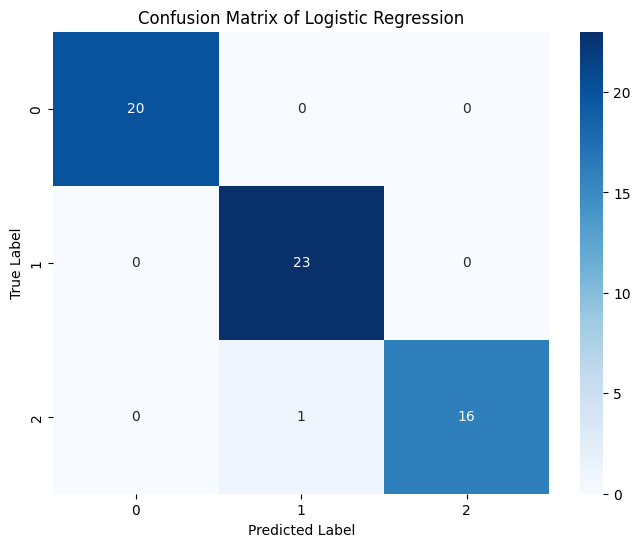

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

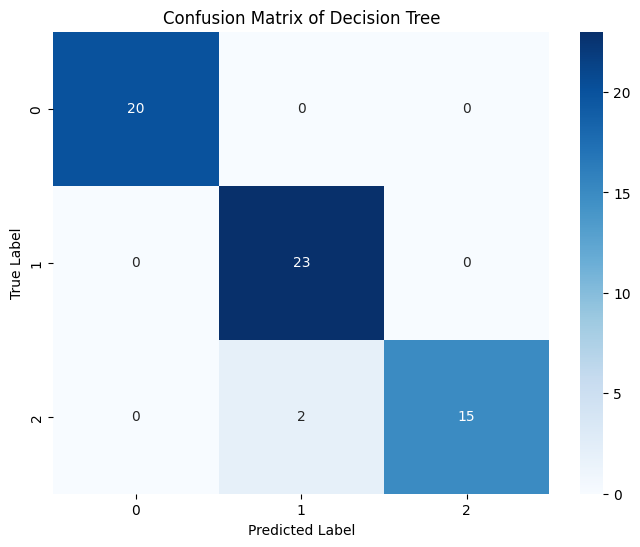

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Decision Tree')
plt.show()